In [1]:
import numpy as np
import matplotlib.pyplot as plt
import stacking_functions as sf
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
import matplotlib as mpl
import scipy.constants as sc
from astropy.io import fits

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['figure.figsize'] = (8,5)

In [2]:
data = np.loadtxt('4bin_cat.data', delimiter='\t')

In [3]:
logstmass = data[:,3]
logstmasslow = data[:,4]
logstmasshigh = data[:,5]
gasfrac = data[:,12]/((10**logstmass)+data[:,12])
gasfraclow = (data[:,12]-data[:,13])/((10**logstmasslow)+(data[:,12]-data[:,13]))
gasfrachigh = (data[:,12]+data[:,13])/((10**logstmasshigh)+(data[:,12]+data[:,13]))

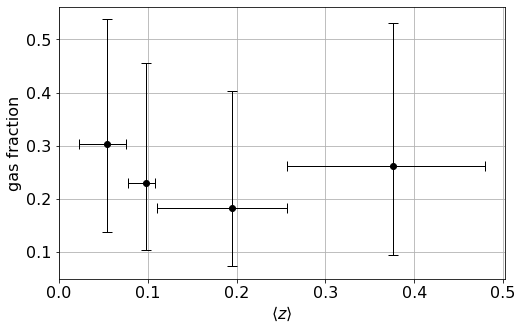

In [4]:
plt.errorbar(data[:,0], gasfrac, yerr=[gasfrac-gasfraclow,gasfrachigh-gasfrac], xerr=[data[:,0]-data[:,1],data[:,2]-data[:,0]], fmt='o', color='k', elinewidth=1, capsize=5)
plt.xlabel(r'$\langle z \rangle$')
plt.ylabel('gas fraction')
plt.grid()
plt.show()

In [5]:
deficiency = sf.calculate_deficiency(logstmass, data[:,14], data[:,15])
deficiencylow = sf.calculate_deficiency(logstmasslow, data[:,14], data[:,15])
deficiencyhigh = sf.calculate_deficiency(logstmasshigh, data[:,14], data[:,15])

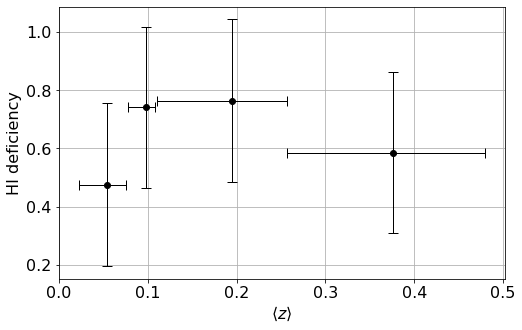

In [6]:
plt.errorbar(data[:,0],deficiency[0],xerr=[data[:,0]-data[:,1],data[:,2]-data[:,0]],yerr=deficiency[1],fmt='o',color='k',elinewidth=1,capsize=5)
plt.xlabel(r'$\langle z \rangle$')
plt.ylabel('HI deficiency')
plt.grid()
plt.show()